<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Multiple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

In [3]:
advert=pd.read_csv('Advertising.csv')
advert.head()  #The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advert.info()
#no need to do project report as a relatively compact and simplistic dataset and all variables of same data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Task 3: Relationship between Features and Response

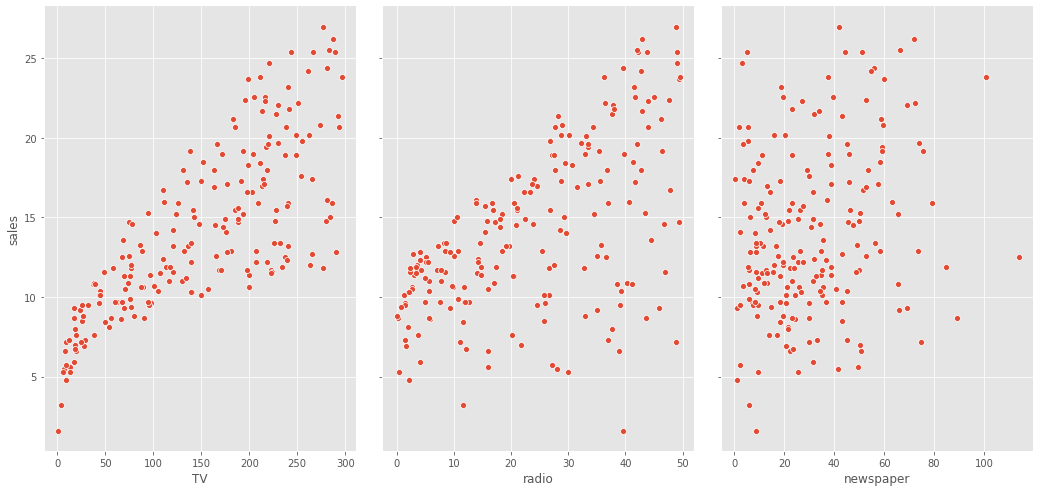

In [5]:
sns.pairplot(advert,x_vars=['TV','radio','newspaper'],y_vars=['sales'],height=7,aspect=0.7)
#from this we can see TV is most linearly correlated with sales,radio less so and newspaper is not at all linearly correlated 

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=advert.loc[:,advert.columns!='sales']
y=advert.sales
lm1=LinearRegression()
lm1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
list(zip(['TV','radio','newspaper'],lm1.coef_))
#interpretation of the coeff is as folows:
#if TV adv budget increased by 1000 dollars then increase in sales by 46 units
#if radio adv budget increased by 1000 dollars then increase in sales by 189 units
#if Tnewspaper adv budget increased by 1000 dollars then no effect on sales
#all these are under the assumption that the features are not related to each other and only correlated with output variable i.e. no synergy effect

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

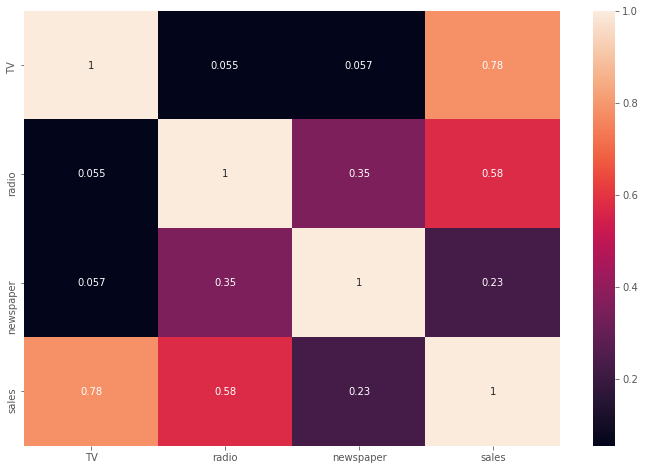

In [17]:
sns.heatmap(advert.corr(),annot=True) #correlation matrix
#interpreation is as follows:
#as r(newspaper,radio)=0.35 means although newspaper adv may not be really helpful for sales but in markets where radio advertising is higher there newspaper adv is also really high

### Task 5: Feature Selection

In [19]:
#now from qualitative assessment we have determined newspaper adv not be of any use to our sales so now to check it quantitatively
#r2 score used for this purpose and it is computed on train data
from sklearn.metrics import r2_score
lm2=LinearRegression().fit(X[['TV','radio']],y)
print('r2_score: ',r2_score(y,lm2.predict(X[['TV','radio']])))  #imp: the format is actual target,prediccted target

r2_score:  0.8971942610828956


In [20]:
lm3=LinearRegression().fit(X,y)
print('r2_score: ',r2_score(y,lm3.predict(X)))
#as no inc in r2 score so we can now confidently drop newspaper adv from model as its inclusion will likely lead to overfitting

r2_score:  0.8972106381789522


### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [34]:
#RMSE is most commonly used metric as it severly punsishes the larger errors and is interpretable as s.d. of unexplained variance
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
lm4=LinearRegression().fit(X_train,y_train)
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,lm4.predict(X_test))))
print('R2 score: ',r2_score(y_test,lm4.predict(X_test)))

RMSE is:  1.4046514230328955
R2 score:  0.9156213613792232


In [35]:
X_no_newspaper=X.loc[:,X.columns!='newspaper']
X_train,X_test,y_train,y_test=train_test_split(X_no_newspaper,y,random_state=1)
lm5=LinearRegression().fit(X_train,y_train)
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,lm5.predict(X_test))))
print('R2 score: ',r2_score(y_test,lm5.predict(X_test)))
#thus our second model works better with a lower RMSE and a higher R2_Score

RMSE is:  1.3879034699382888
R2 score:  0.9176214942248908


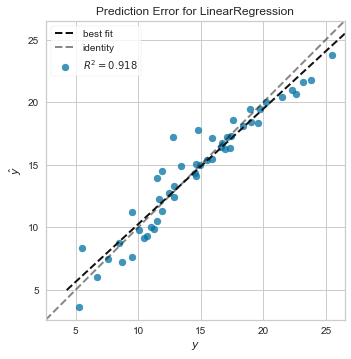

In [36]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
visualizer=PredictionError(lm5).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()
#there is  still an unexplained variability in our data which maybe due to non linear relatios or synergy problems which we address next


In [ ]:
#we were under the assumption that if TV adv increases by (beta1*1000) then a sales inc of 1000 dollars observed and the effect of radio adv had no effect on this relation.
#but this simple model maybe incorrect and actually increasing radio adv budget may be increasing the effectiveness of TV advertising so slope of TV must inc as radio inc
#so rather than just comparing Beta values of each feature to see which to give entire budget to instead there should be an even allocation to all the adverising mediums and this is called synergy effect.
#from above graph such we can say such an effect maybe present.
#imp to know that a basic multivariate regression model assumes that each feature is independant of all other features and so we only consider the correlation between a feature and target but if synergy effect is present in data indicating features maybbe related then an interaction term must be included in  our model equation.


### Task 7: Interaction Effect (Synergy)

In [37]:
#interaction term is mult of values of radio and tv columns
advert['interact']=advert['TV']*advert['radio']
X_new=advert[['TV','radio','interact']]
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=1)
lm6=LinearRegression().fit(X_train,y_train)
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,lm6.predict(X_test))))
print('R2 score: ',r2_score(y_test,lm6.predict(X_test)))
#great results as RMSE decreased greatly amd r2 score inc dramatically 

RMSE is:  0.7011871137164326
R2 score:  0.9789736814681261


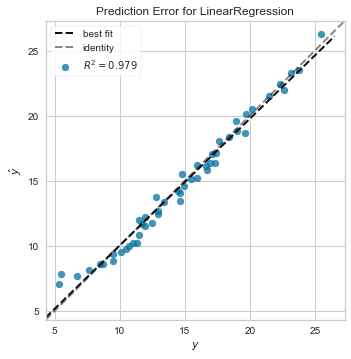

In [39]:
visualizer=PredictionError(lm6).fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()
#thus the line is greatly fit to the data and interact term indicates the inc of effectiveness of TV adv as radio budget is increased